### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

sns.set()

### Exploratory data analysis (EDA) of the scraped data

In [2]:
df_1 = pd.read_csv("scraped_data/BOM_BLR.csv")
df_2 = pd.read_csv("scraped_data/BOM_DEL.csv")
df_3 = pd.read_csv("scraped_data/DEL_BLR.csv")
df_4 = pd.read_csv("scraped_data/DEL_BOM.csv")

In [3]:
print("Number of entries from each route\n")
print(f"df_1  ::  {df_1['Source'][0]} - {df_1['Destination'][0]} => {df_1.shape[0]} entries")
print(f"df_2  ::  {df_2['Source'][0]} - {df_2['Destination'][0]} => {df_2.shape[0]} entries")
print(f"df_3  ::  {df_3['Source'][0]} - {df_3['Destination'][0]} => {df_3.shape[0]} entries")
print(f"df_4  ::  {df_4['Source'][0]} - {df_4['Destination'][0]} => {df_4.shape[0]} entries")

Number of entries from each route

df_1  ::  BOM - BLR => 3254 entries
df_2  ::  BOM - DEL => 5772 entries
df_3  ::  DEL - BLR => 5631 entries
df_4  ::  DEL - BOM => 5346 entries


In [4]:
df_1.head()

,Airline,Source,Destination,Dep time,Arr time,Duration,Total stops,Date,Price
0,Vistara,BOM,BLR,17:30,19:15,1h45m,direct,2022-01-01,5418
1,GoFirst,BOM,BLR,06:05,07:40,1h35m,direct,2022-01-01,5100
2,GoFirst,BOM,BLR,14:35,16:10,1h35m,direct,2022-01-01,5100
3,IndiGo,BOM,BLR,08:30,10:05,1h35m,direct,2022-01-01,5103
4,IndiGo,BOM,BLR,06:55,08:30,1h35m,direct,2022-01-01,5103


In [5]:
def clean_duration(duration):
    duration = list(duration)
    duration_hours = []
    duration_mins = []

    
    for i in range(len(duration)):
            
        duration_hours.append(int(duration[i].split(sep = "h")[0]))     # Extract hours from duration
        duration_mins.append(int(duration[i].split(sep = "m")[0].split('h')[-1]))   # Extracts only minutes from duration
        

    d = []
    for i in range(len(duration)):
        d.append(duration_hours[i]*60+duration_mins[i])
        
    return d

def clean_date(date):
        date = pd.to_datetime(date)
        return date
    

In [7]:
dfs_raw = [df_1,df_2,df_3,df_4]

In [8]:
dfs = []
for df in dfs_raw:
    df.drop_duplicates() # drop duplicate rows
    df["Duration"] = clean_duration(df["Duration"]) # convert duration to numerical minutes format
    df["Date"] = clean_date(df["Date"]) # convert date to datetime format

In [9]:
df_2.tail()

,Airline,Source,Destination,Dep time,Arr time,Duration,Total stops,Date,Price
5767,SpiceJet,BOM,DEL,12.30,17.40,310,1stop,2022-01-03,29737
5768,SpiceJet,BOM,DEL,11.20,17.35,375,1stop,2022-01-03,31744
5769,SpiceJet,BOM,DEL,11.15,17.45,390,1stop,2022-01-03,31744
5770,SpiceJet,BOM,DEL,15.30,22.10,400,1stop,2022-01-03,31744
5771,SpiceJetAlaskaSeaplanes,BOM,DEL,14.55,21.15,380,1stop,2022-01-03,33122


In [10]:
df_1= df_1.set_index("Airline")
df_1= df_1.drop([ 'AirIndiaExpressIndiGo', 'GoFirstIndiGo',
        'IndiGoAirIndia', 'IndiGoVistara',
       'VistaraIndiGo'])
df_1.reset_index(inplace = True)



In [11]:

df_2= df_2.set_index("Airline")
df_2= df_2.drop(['AirAsiaIndiaAirIndia', 'AirAsiaIndiaIndiGo', 
   'GoFirstAirAsiaIndia',
   'GoFirstIndiGo', 'GoFirstVistara', 'IndiGoAirAsiaIndia',
   'IndiGoAirIndia', 'IndiGoGoFirst', 'IndiGoSpiceJet', 'IndiGoVistara',
   'MultipleAirlines', 'SpiceJetAirAsiaIndia',
   'SpiceJetAirIndia', 'SpiceJetAlaskaSeaplanes', 'SpiceJetIndiGo',
   'SpiceJetVistara', 'SriLankanAirlines', 'VistaraGoFirst',
   'VistaraIndiGo'])
df_2.reset_index(inplace = True)



In [12]:
df_3= df_3.set_index("Airline")
df_3= df_3.drop(['AirAsiaIndiaGoFirst', 'AirAsiaIndiaIndiGo',
        'AirIndiaAirAsiaIndia',
       'AirIndiaGoFirst', 'AirIndiaIndiGo',
       'AirIndiaVistara',
       'IndiGoGoFirst', 'IndiGoSpiceJet',
       'IndiGoVistara', 'MultipleAirlines',
       'QatarAirways',
       'SpiceJetAirAsiaIndia', 'SpiceJetIndiGo',
        'VistaraGoFirst', 'VistaraIndiGo'])
df_3.reset_index(inplace = True)


In [13]:
df_4= df_4.set_index("Airline")
df_4= df_4.drop([ 'AlaskaSeaplanesSpiceJet',
       'IndiGoGoFirst', 'IndiGoVistara','SpiceJetVistara',
        'VistaraIndiGo'])
df_4.reset_index(inplace = True)



##### Number of entries from each route

##### df_1  ::  BOM - BLR   =>   3254 entries
##### df_2  ::  BOM - DEL   =>   5772 entries
##### df_3  ::  DEL - BLR   =>   5631 entries
##### df_4  ::  DEL - BOM   =>   5346 entries

In [14]:
print("Number of entries from each route\n")
print(f"df_1  ::  {df_1['Source'][0]} - {df_1['Destination'][0]} => {df_1.shape[0]} entries")
print(f"df_2  ::  {df_2['Source'][0]} - {df_2['Destination'][0]} => {df_2.shape[0]} entries")
print(f"df_3  ::  {df_3['Source'][0]} - {df_3['Destination'][0]} => {df_3.shape[0]} entries")
print(f"df_4  ::  {df_4['Source'][0]} - {df_4['Destination'][0]} => {df_4.shape[0]} entries")

Number of entries from each route

df_1  ::  BOM - BLR => 3191 entries
df_2  ::  BOM - DEL => 5337 entries
df_3  ::  DEL - BLR => 5254 entries
df_4  ::  DEL - BOM => 5216 entries


In [15]:
df = pd.DataFrame()
df = df.append(df_1, ignore_index=True)
df = df.append(df_2, ignore_index=True)
df = df.append(df_3, ignore_index=True)
df = df.append(df_4, ignore_index=True)
df.head()

,Airline,Source,Destination,Dep time,Arr time,Duration,Total stops,Date,Price
0,Vistara,BOM,BLR,17:30,19:15,105,direct,2022-01-01,5418
1,GoFirst,BOM,BLR,06:05,07:40,95,direct,2022-01-01,5100
2,GoFirst,BOM,BLR,14:35,16:10,95,direct,2022-01-01,5100
3,IndiGo,BOM,BLR,08:30,10:05,95,direct,2022-01-01,5103
4,IndiGo,BOM,BLR,06:55,08:30,95,direct,2022-01-01,5103


In [16]:
df.replace({"direct":0,"1stop":1, "2stops":2}, inplace=True)

In [17]:
df["Total stops"]=df["Total stops"].astype(int)

In [18]:

df["Journey_day"]= pd.to_datetime(df["Date"], format = "%d/%m/%Y").dt.day
df["Journey_month"]= pd.to_datetime(df["Date"], format = "%d/%m/%Y").dt.month
df["dep_hour"]= pd.to_datetime(df["Dep time"]).dt.hour
df["dep_min"]= pd.to_datetime(df["Dep time"]).dt.minute
df["arr_hour"]= pd.to_datetime(df["Arr time"]).dt.hour
df["arr_min"]= pd.to_datetime(df["Arr time"]).dt.minute

df.drop(["Date", "Dep time", "Arr time"], axis=1, inplace=True)

In [19]:
df.head()

,Airline,Source,Destination,Duration,Total stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min
0,Vistara,BOM,BLR,105,0,5418,1,1,17,30,19,15
1,GoFirst,BOM,BLR,95,0,5100,1,1,6,5,7,40
2,GoFirst,BOM,BLR,95,0,5100,1,1,14,35,16,10
3,IndiGo,BOM,BLR,95,0,5103,1,1,8,30,10,5
4,IndiGo,BOM,BLR,95,0,5103,1,1,6,55,8,30


In [20]:
df["Airline"].value_counts()

Vistara            5413
IndiGo             5409
GoFirst            3485
SpiceJet           1628
AirAsiaIndia       1560
AirIndia           1342
AlaskaSeaplanes      93
flydubai             35
Emirates             33
Name: Airline, dtype: int64

In [21]:
Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_AirIndia,Airline_AlaskaSeaplanes,Airline_Emirates,Airline_GoFirst,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Airline_flydubai
0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0


In [22]:
Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_DEL
0,0
1,0
2,0
3,0
4,0


In [23]:
Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_BOM,Destination_DEL
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [24]:
finaldf= pd.concat([df, Airline, Source, Destination], axis=1)

In [25]:
finaldf.drop(["Airline", "Source", "Destination"],axis=1, inplace= True)

### Merging all to get one final dataframe

In [26]:
finaldf.head()

,Duration,Total stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,Airline_AirIndia,Airline_AlaskaSeaplanes,Airline_Emirates,Airline_GoFirst,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Airline_flydubai,Source_DEL,Destination_BOM,Destination_DEL
0,105,0,5418,1,1,17,30,19,15,0,0,0,0,0,0,1,0,0,0,0
1,95,0,5100,1,1,6,5,7,40,0,0,0,1,0,0,0,0,0,0,0
2,95,0,5100,1,1,14,35,16,10,0,0,0,1,0,0,0,0,0,0,0
3,95,0,5103,1,1,8,30,10,5,0,0,0,0,1,0,0,0,0,0,0
4,95,0,5103,1,1,6,55,8,30,0,0,0,0,1,0,0,0,0,0,0


In [27]:
finaldf.shape

(18998, 20)

In [28]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18998 entries, 0 to 18997
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Duration                 18998 non-null  int64
 1   Total stops              18998 non-null  int32
 2   Price                    18998 non-null  int64
 3   Journey_day              18998 non-null  int64
 4   Journey_month            18998 non-null  int64
 5   dep_hour                 18998 non-null  int64
 6   dep_min                  18998 non-null  int64
 7   arr_hour                 18998 non-null  int64
 8   arr_min                  18998 non-null  int64
 9   Airline_AirIndia         18998 non-null  uint8
 10  Airline_AlaskaSeaplanes  18998 non-null  uint8
 11  Airline_Emirates         18998 non-null  uint8
 12  Airline_GoFirst          18998 non-null  uint8
 13  Airline_IndiGo           18998 non-null  uint8
 14  Airline_SpiceJet         18998 non-null  uint8
 15  Ai

In [29]:
df.head()

,Airline,Source,Destination,Duration,Total stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min
0,Vistara,BOM,BLR,105,0,5418,1,1,17,30,19,15
1,GoFirst,BOM,BLR,95,0,5100,1,1,6,5,7,40
2,GoFirst,BOM,BLR,95,0,5100,1,1,14,35,16,10
3,IndiGo,BOM,BLR,95,0,5103,1,1,8,30,10,5
4,IndiGo,BOM,BLR,95,0,5103,1,1,6,55,8,30


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18998 entries, 0 to 18997
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        18998 non-null  object
 1   Source         18998 non-null  object
 2   Destination    18998 non-null  object
 3   Duration       18998 non-null  int64 
 4   Total stops    18998 non-null  int32 
 5   Price          18998 non-null  int64 
 6   Journey_day    18998 non-null  int64 
 7   Journey_month  18998 non-null  int64 
 8   dep_hour       18998 non-null  int64 
 9   dep_min        18998 non-null  int64 
 10  arr_hour       18998 non-null  int64 
 11  arr_min        18998 non-null  int64 
dtypes: int32(1), int64(8), object(3)
memory usage: 1.7+ MB


In [31]:
finaldf.columns

Index(['Duration', 'Total stops', 'Price', 'Journey_day', 'Journey_month',
       'dep_hour', 'dep_min', 'arr_hour', 'arr_min', 'Airline_AirIndia',
       'Airline_AlaskaSeaplanes', 'Airline_Emirates', 'Airline_GoFirst',
       'Airline_IndiGo', 'Airline_SpiceJet', 'Airline_Vistara',
       'Airline_flydubai', 'Source_DEL', 'Destination_BOM', 'Destination_DEL'],
      dtype='object')

In [32]:
X = finaldf.loc[:, ['Duration', 'Total stops', 'Journey_day', 'Journey_month',
       'dep_hour', 'dep_min', 'arr_hour', 'arr_min', 'Airline_AirIndia',
       'Airline_AlaskaSeaplanes', 'Airline_Emirates', 'Airline_GoFirst',
       'Airline_IndiGo', 'Airline_SpiceJet', 'Airline_Vistara',
       'Airline_flydubai', 'Source_DEL', 'Destination_BOM', 'Destination_DEL']]
X.head()  #no price here

,Duration,Total stops,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,Airline_AirIndia,Airline_AlaskaSeaplanes,Airline_Emirates,Airline_GoFirst,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Airline_flydubai,Source_DEL,Destination_BOM,Destination_DEL
0,105,0,1,1,17,30,19,15,0,0,0,0,0,0,1,0,0,0,0
1,95,0,1,1,6,5,7,40,0,0,0,1,0,0,0,0,0,0,0
2,95,0,1,1,14,35,16,10,0,0,0,1,0,0,0,0,0,0,0
3,95,0,1,1,8,30,10,5,0,0,0,0,1,0,0,0,0,0,0
4,95,0,1,1,6,55,8,30,0,0,0,0,1,0,0,0,0,0,0


In [33]:
y= finaldf.iloc[:, 2]
y.head()    #price (target feature)

0    5418
1    5100
2    5100
3    5103
4    5103
Name: Price, dtype: int64

### Heatmap for data visualisation

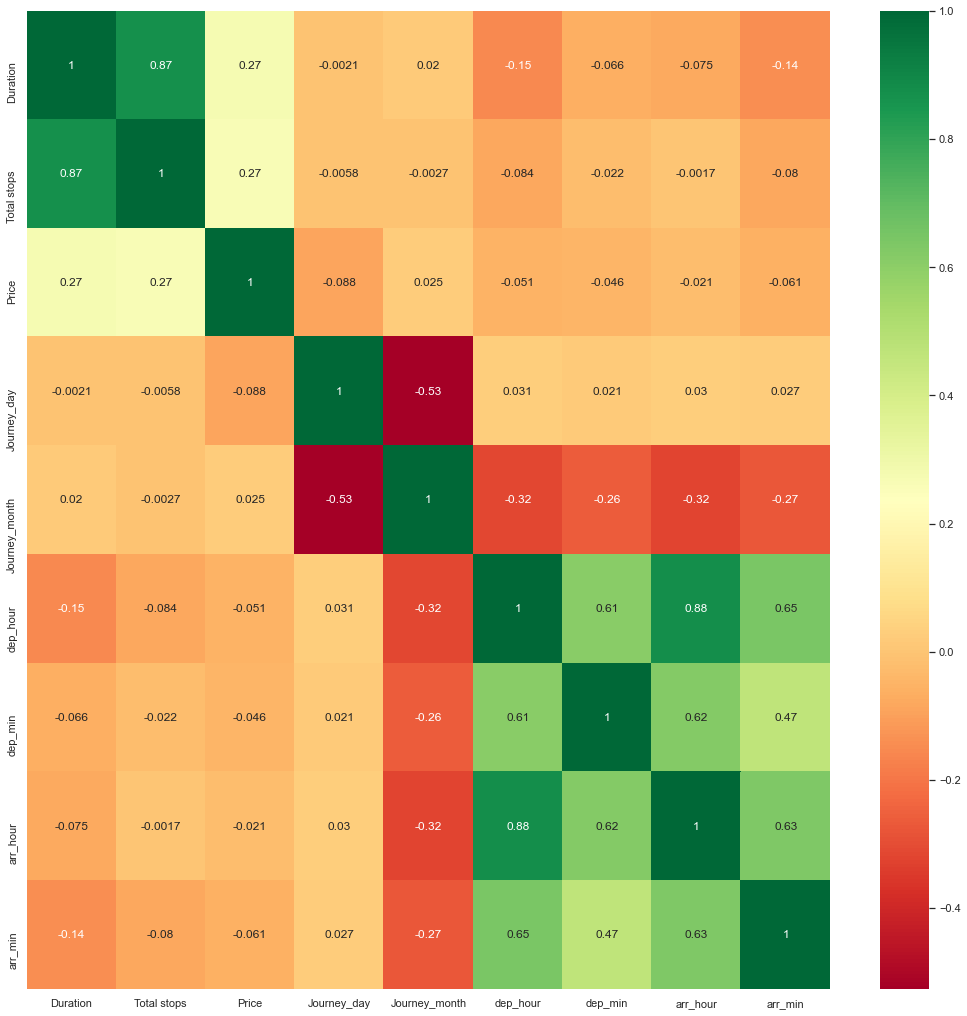

In [34]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [36]:
print(selection.feature_importances_)

[0.15187746 0.13156343 0.07010626 0.05358981 0.01630451 0.00454749
 0.01302279 0.00544909 0.00135283 0.0292262  0.22440325 0.00137037
 0.00795842 0.20088829 0.00325418 0.06204814 0.01022581 0.00518459
 0.00762707]


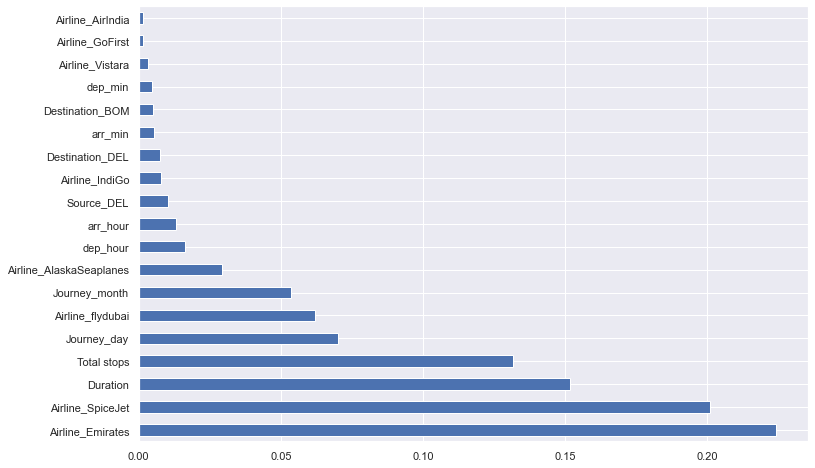

In [37]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Importin necessary sklearn modules

In [38]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import metrics

### Function to get metrics for a model

In [39]:
def get_metrics(model):
    print(f'Train score {model.score(X_train, y_train)}')
    print(f'Val score {model.score(X_val, y_val)}')
    print("MAE:" , metrics.mean_absolute_error(y_val,model.predict(X_val)))
    print("MSE:" , metrics.mean_squared_error(y_val,model.predict(X_val)))
    print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_val,model.predict(X_val))))

### Splitting data into train and test set

In [40]:
X_train_or, X_test, y_train_or, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_or, y_train_or, test_size=0.25)

### Baseline Linear Regression

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_val, y_val)
get_metrics(lr)

Train score 0.5797706604868889
Val score 0.49900539071224503
MAE: 2545.7501929909567
MSE: 22015484.99345609
RMSE: 4692.066175306577


### Polynomial

In [42]:
for degree in [1,2,3]:
    poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly.fit(X_train, y_train)
    print("-"*20)
    print("Degree", degree)
    get_metrics(poly)

--------------------
Degree 1
Train score 0.579770660486889
Val score 0.4990053907122456
MAE: 2545.750192990944
MSE: 22015484.99345607
RMSE: 4692.066175306575
--------------------
Degree 2
Train score 0.7664299863308068
Val score 0.7404469015690023
MAE: 1770.7370682500998
MSE: 11405686.284002746
RMSE: 3377.230564234954
--------------------
Degree 3
Train score 0.8678467487564785
Val score 0.6073440541788856
MAE: 1439.8885241766975
MSE: 17254698.798267763
RMSE: 4153.8775617810115


### Lasso

In [43]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
get_metrics(lasso_model)

Train score 0.5797347043531064
Val score 0.5003843373596604
MAE: 2542.12969071421
MSE: 21954889.17334117
RMSE: 4685.604461896157


### Ridge

In [44]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
get_metrics(ridge_model)

Train score 0.579108265822739
Val score 0.5084480772709427
MAE: 2541.079510398661
MSE: 21600539.76175697
RMSE: 4647.638084205457


### ElasticNet

In [45]:
EN_model = ElasticNet(alpha=1)
EN_model.fit(X_train, y_train)
EN_model.score(X_val, y_val)
get_metrics(EN_model)

Train score 0.15103253090000457
Val score 0.16785313077680464
MAE: 3000.6360740530945
MSE: 36567493.086961046
RMSE: 6047.1061746062505


### Random Forest

In [46]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
get_metrics(rf)

Train score 0.9620306298161572
Val score 0.8133745944011803
MAE: 871.1696770424129
MSE: 8200984.0828418955
RMSE: 2863.736035817878


In [47]:
test_df = pd.DataFrame({
    "Predicted Price" : rf.predict(X_test),
    "Actual Price" : y_test,
}).reset_index(drop = True)

test_df

,Predicted Price,Actual Price
0,4284.445000,3500
1,2849.464286,2532
2,4121.524000,3837
3,4292.830000,4225
4,3763.676000,4599
...,...,...
3795,3761.083333,3913
3796,4891.590000,4745
3797,4563.160000,4898
3798,16582.574167,4026


### Saving The Final Model

In [48]:
import pickle as pkl

In [ ]:
file = open('rf_flight_prediction.pkl', 'wb')
pkl.dump(rf, file)

In [ ]:
model = open('rf_flight_prediction.pkl','rb')
rf_flight_prediction = pkl.load(model)

In [52]:
print(f'R2 score {metrics.r2_score(y_test,rf_flight_prediction.predict(X_test))}')
print("MAE: " , metrics.mean_absolute_error(y_test,rf_flight_prediction.predict(X_test)))
print("MSE: " , metrics.mean_squared_error(y_test,rf_flight_prediction.predict(X_test)))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(y_test,rf_flight_prediction.predict(X_test))))

R2 score 0.8679532107668898
MAE:  843.6504161602686
MSE:  6880588.97310834
RMSE:  2623.087679264332
